In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
print('ready')

ready


In [2]:
food_prices = pd.read_csv('datasets/africa_food_prices.csv')

In [3]:
# find the null values
food_prices.isnull().sum()

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [4]:
# Create a function to replace the null values under state with the market's name
def fill_nulls(row):
    if pd.isnull(row['state']):
        return row['market']
    else:
        return row['state']


In [5]:
food_prices['state'] = food_prices.apply(fill_nulls, axis=1)

In [6]:
food_prices.isnull().sum()

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                      0
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [7]:
# Drop the entire mp_commoditysource column (because it is empty)
food_prices.drop(columns=food_prices.columns[-1], inplace=True)
food_prices.isnull().sum()

Unnamed: 0     0
country_id     0
country        0
state_id       0
state          0
market_id      0
market         0
produce_id     0
produce        0
currency_id    0
currency       0
pt_id          0
market_type    0
um_unit_id     0
quantity       0
month          0
year           0
price          0
dtype: int64

In [8]:
# drop currency_id beacuse it has only 1 vaule
food_prices.drop(columns = ['currency_id'], inplace = True)

In [9]:
food_prices

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency,pt_id,market_type,um_unit_id,quantity,month,year,price
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0000
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,5,2015,96.0000
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,6,2015,96.0000
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,7,2015,83.0000
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,ZWL,15,Retail,5,KG,6,2021,233.3333
956775,2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,ZWL,15,Retail,116,100 ML,6,2021,112.5000
956776,2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,ZWL,15,Retail,5,KG,6,2021,114.0000
956777,2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [10]:
food_prices.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,pt_id,um_unit_id,month,year,price
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,5.159597e+05,10404.034922,98565.608270,1027.751212,165.401303,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


In [11]:
food_prices.country.nunique()

42

In [12]:
#Due to unforeseen circumstances, the columns 'um_unit_id' and 'Quantity' appear to have been inadvertently swapped. 
#To rectify this, we will rename these columns accordingly as well as every other one. 
food_prices=food_prices.rename(columns={'country_id':'Country_ID','country':'Country','state_id':'State_ID',
                    'state':'State','market_id':'Market_ID','market':'Market','produce_id':'Produce_ID',
                    'produce':'Produce', 'currency':'Currency',
                    'pt_id ':'PT_ID','market_type':'Market_Type','um_unit_id':'Quantity',
                     'quantity':'Um_Unit_ID','month':'Month','year':'Year','price':'Price'})

In [13]:
food_prices.columns

Index(['Unnamed: 0', 'Country_ID', 'Country', 'State_ID', 'State', 'Market_ID',
       'Market', 'Produce_ID', 'Produce', 'Currency', 'pt_id', 'Market_Type',
       'Quantity', 'Um_Unit_ID', 'Month', 'Year', 'Price'],
      dtype='object')

In [14]:
grp1=food_prices.groupby('Country')

In [15]:
grp1.first()

,Unnamed: 0,Country_ID,State_ID,State,Market_ID,Market,Produce_ID,Produce,Currency,pt_id,Market_Type,Quantity,Um_Unit_ID,Month,Year,Price
Country,,,,,,,,,,,,,,,,
Algeria,15427,4.0,344,Alger,1794,Algiers,52,Rice - Retail,DZD,15,Retail,5,KG,4,2015,90.0000
Angola,17220,8.0,408,Luanda,2593,Luanda,55,Bread - Retail,AOA,15,Retail,33,Unit,1,2008,35.2000
Benin,185502,29.0,609,Alibori,1044,Malanville (CBM),51,Maize - Wholesale,XOF,14,Wholesale,5,KG,1,2002,145.0000
Burundi,278239,43.0,40542,Bubanza,1827,Musenyi,50,Beans - Retail,BIF,15,Retail,5,KG,10,2014,1244.6666
Cameroon,361031,45.0,815,Adamaoua,2257,Batoua Godolé,51,Maize - Wholesale,XAF,14,Wholesale,17,90 KG,1,2018,17500.0000
Cape Verde,383507,47.0,848,Santiago,535,Santiago,58,Wheat flour - Retail,CVE,15,Retail,5,KG,1,2006,45.5000
Central African Republic,385642,49.0,853,Bamingui-Bangoran,2220,Ndélé,51,Maize - Retail,XAF,15,Retail,5,KG,11,2018,282.4320
Chad,398362,50.0,0,National Average,1965,National Average,64,Rice (imported) - Retail,XAF,15,Retail,5,KG,11,2018,567.0000
Congo,445110,59.0,970,Bouenza,1821,Nkayi,55,Bread - Retail,XAF,15,Retail,5,KG,1,2016,800.0000


In [16]:
grp1=food_prices.groupby('Country')


Exploratory Data Analysis On the dataset




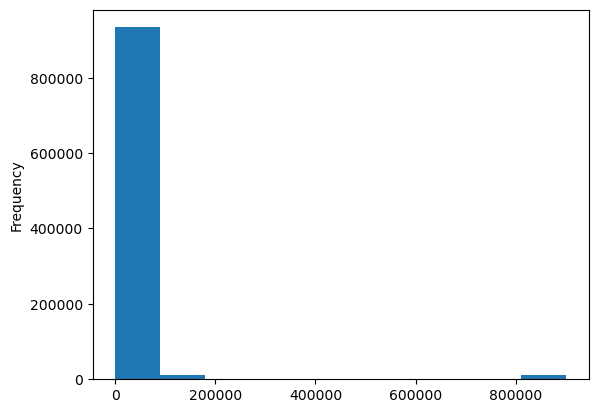

In [17]:
food_prices.State_ID.plot(kind='hist').Title= 'State distribution'

In [18]:
food_prices.columns

Index(['Unnamed: 0', 'Country_ID', 'Country', 'State_ID', 'State', 'Market_ID',
       'Market', 'Produce_ID', 'Produce', 'Currency', 'pt_id', 'Market_Type',
       'Quantity', 'Um_Unit_ID', 'Month', 'Year', 'Price'],
      dtype='object')

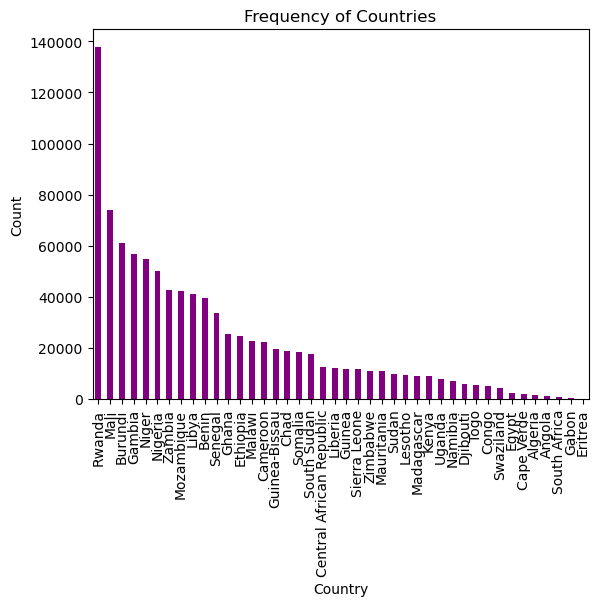

In [19]:
 
food_prices.Country.value_counts().plot(kind='bar', color='purple')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Frequency of Countries')
plt.show()

In [20]:
food_ = grp1.get_group('Nigeria')

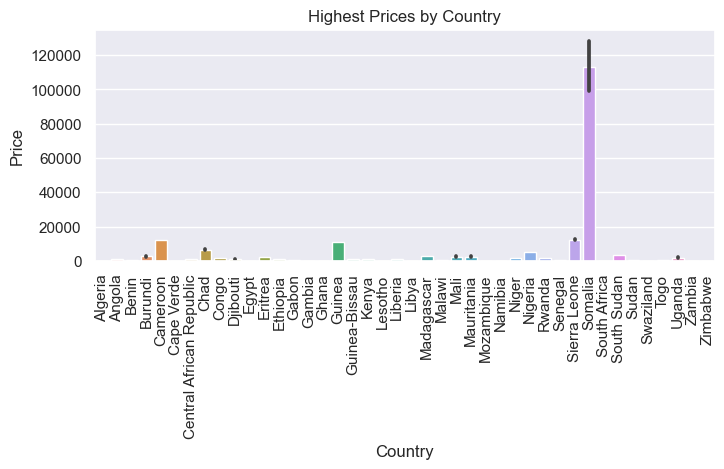

In [21]:
#Highest Prices of Produce by country
sns.set(rc={'figure.figsize': (8, 3)})
sns.set_style('darkgrid')
sns.barplot(data=food_prices, x='Country', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Price')
plt.title('Highest Prices by Country')
plt.show()

In [22]:
# Convert 'Month' and 'Year' to datetime
food_prices['Date'] = pd.to_datetime(food_prices['Year'].astype(str) + '-' + food_prices['Month'].astype(str))

# Group by Date and calculate average price
average_price = food_prices.groupby('Date')['Price'].mean()
average_price

Date
1990-01-01      95.083333
1990-02-01      94.916667
1990-03-01      95.833333
1990-04-01      98.083333
1990-05-01     100.900000
                 ...     
2021-04-01    3413.335918
2021-05-01    2723.265537
2021-06-01    2999.889042
2021-07-01    2922.596405
2021-08-01    4928.551213
Name: Price, Length: 380, dtype: float64

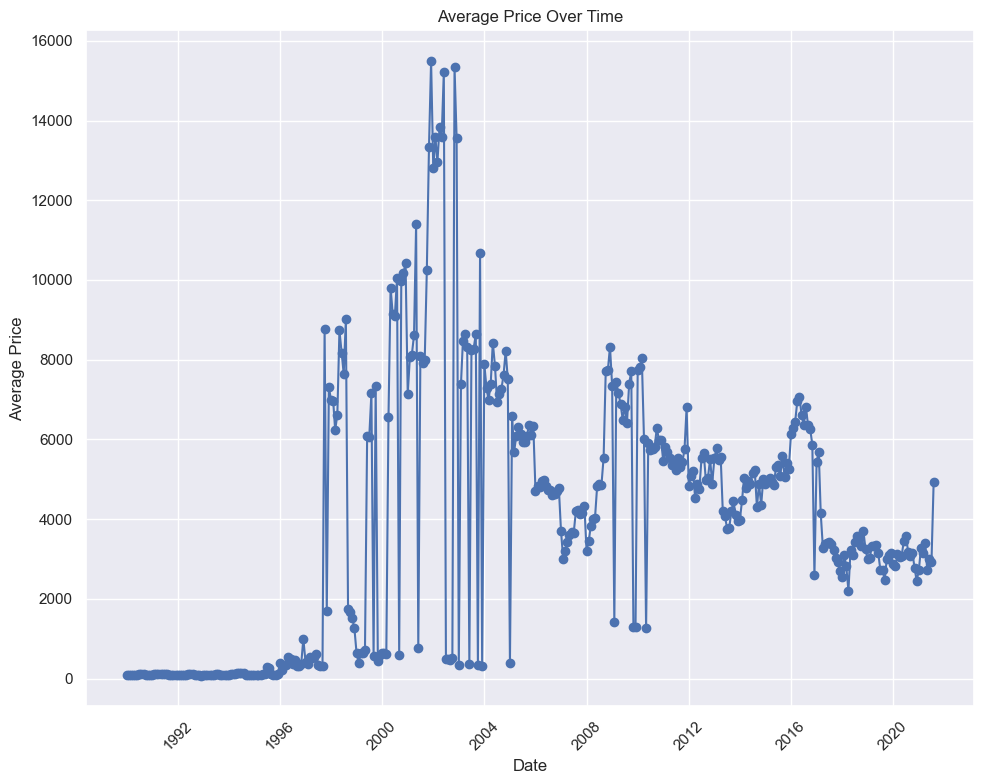

In [23]:
# Plot price trend over time
plt.figure(figsize=(10, 8))
plt.plot(average_price.index, average_price.values, marker='o')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
# Group and aggregate data to calculate sales metrics
sales_data = food_prices.groupby(['Year', 'Country'])['Price'].agg(['sum', 'count', 'mean']).reset_index()


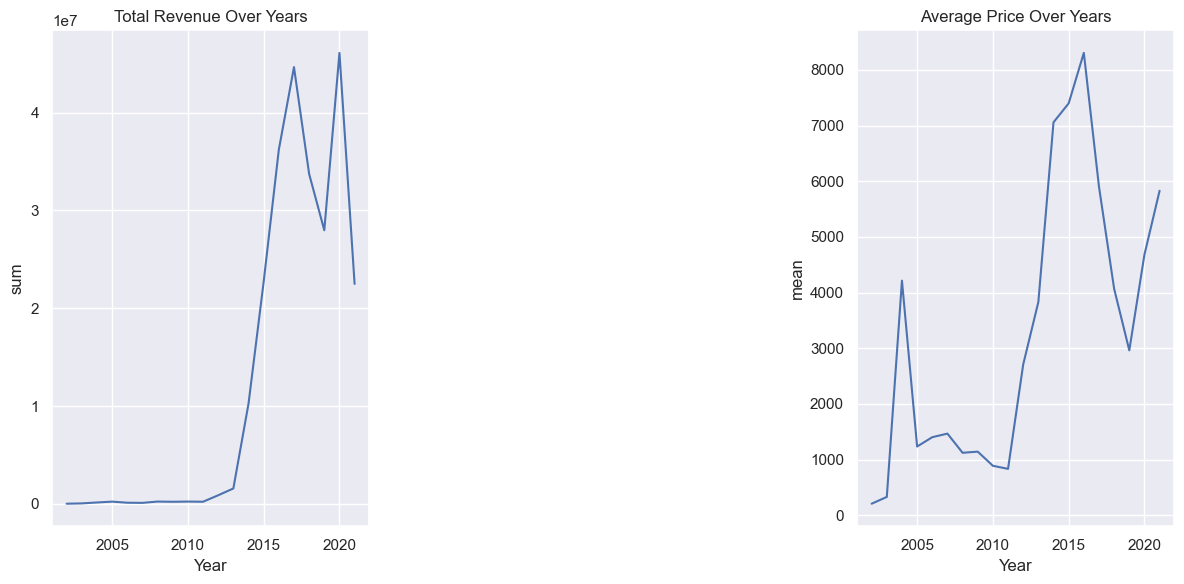

In [25]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')

# Choose a specific country to analyze, or loop through multiple countries
selected_country = 'Nigeria'  

# Filter data for the selected country
country_data = sales_data[sales_data['Country'] == selected_country]

# Line chart showing total revenue over the years
plt.subplot(1, 3, 1)
sns.lineplot(data=country_data, x='Year', y='sum')
plt.title('Total Revenue Over Years')

# Line chart showing average price over the years
plt.subplot(1, 3, 3)
sns.lineplot(data=country_data, x='Year', y='mean')
plt.title('Average Price Over Years')

plt.tight_layout()
plt.show()

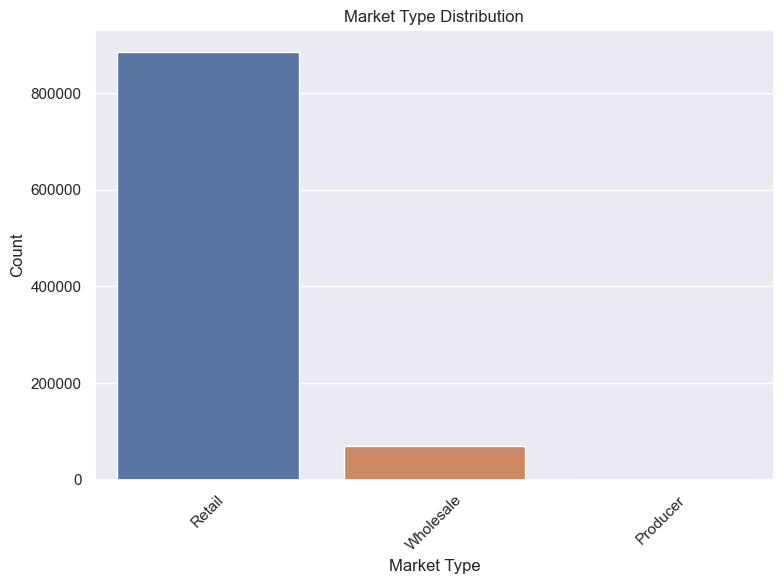

In [26]:
# Plot market type distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=food_prices, x='Market_Type')
plt.title('Market Type Distribution')
plt.xlabel('Market Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


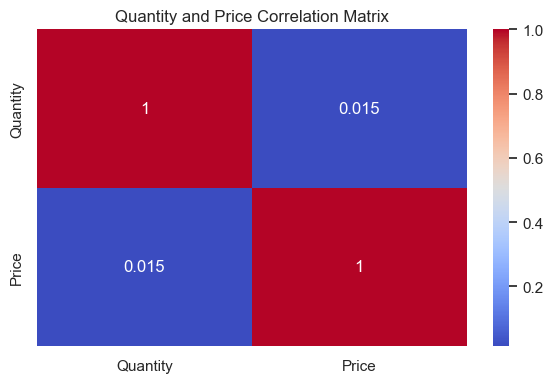

In [27]:
corr_matrix = food_prices[['Quantity', 'Price']].corr()
# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Quantity and Price Correlation Matrix')
plt.tight_layout()
plt.show()

Research Questions on the dataset

1.Top 10 African Countires With Most Market Activies

In [28]:
#Countries with the most market Activities
Countries=food_prices.Country.value_counts().head(10)
Countries

Rwanda        137746
Mali           73843
Burundi        60921
Gambia         56971
Niger          54974
Nigeria        50285
Zambia         42793
Mozambique     42278
Libya          41207
Benin          39530
Name: Country, dtype: int64

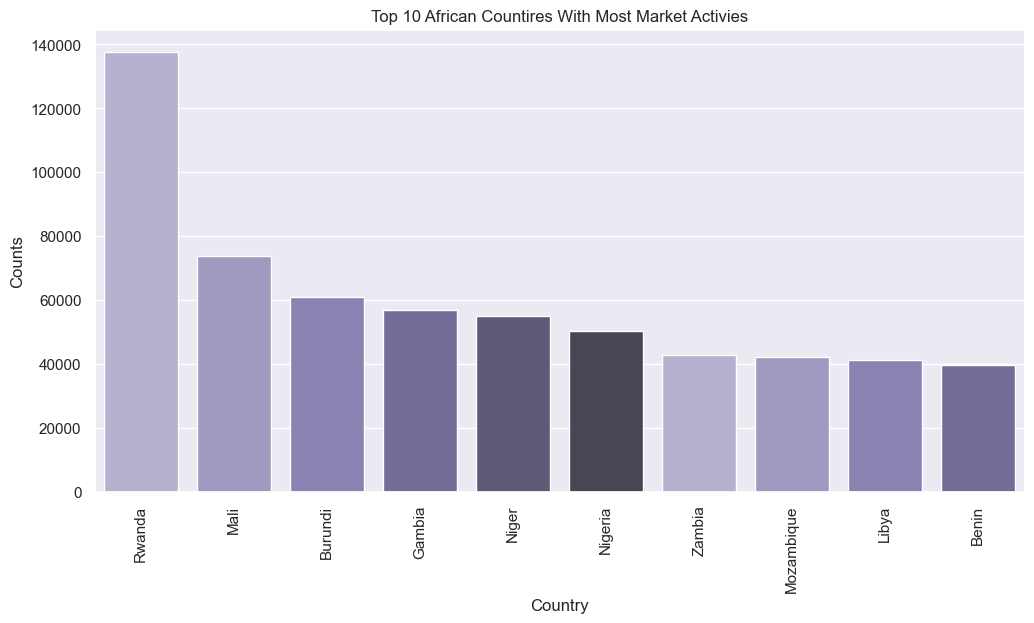

In [29]:
#plot countries.index againt countries to get a visualization
plt.figure(figsize= (12,6))
plt.title('Top 10 African Countires With Most Market Activies')
plt.xticks(rotation = 90)
color_palette = sns.color_palette("Purples_d")
sns.barplot(x= Countries.index, y= Countries, palette=color_palette)
sns.set_style('darkgrid')
plt.xlabel('Country')
plt.ylabel('Counts');

Analyzing the box plot, it's evident that Rwanda stands out as the country with the highest frequency of market activities among all 42 countries in the dataset. Following closely, Mali takes the second spot in terms of market activity occurrence, with Burundi securing the third position. This observation suggests that Rwanda has a robust market landscape, followed by Mali and Burundi, showcasing their prominence in the dataset's market-related activities

2.Top Countries by Sales Revenue

In [30]:
# Calculate sales revenue by country
food_prices['Revenue'] = food_prices['Price'] * food_prices['Quantity']
revenue_by_country = food_prices.groupby('Country')['Revenue'].sum().nlargest(10)
revenue_by_country


Country
Somalia        6.166089e+10
Mali           9.567138e+09
Chad           7.164972e+09
Rwanda         5.859777e+09
Cameroon       5.830231e+09
Nigeria        3.324014e+09
South Sudan    3.157267e+09
Mauritania     1.387465e+09
Burundi        8.959612e+08
Niger          8.618994e+08
Name: Revenue, dtype: float64

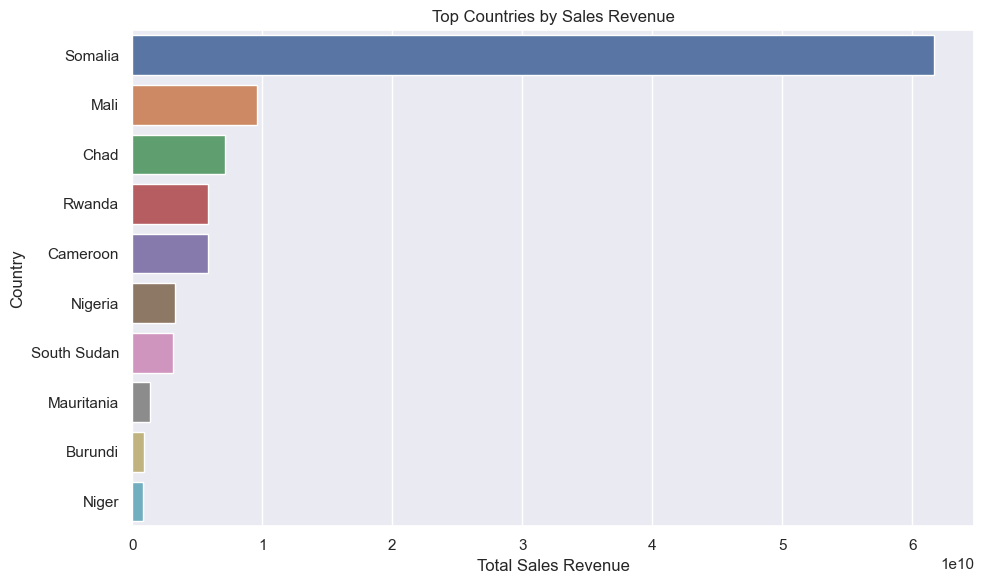

In [31]:
# Plot sales revenue by country
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index)
plt.title('Top Countries by Sales Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In this trend analysis, it becomes evident that Somalia emerges as the leader in terms of sales revenue among all countries. Following closely, Mali secures the second position, and Chad ranks third in this aspect. Interestingly, Rwanda, despite having the highest number of market activities, takes the fourth spot, while Nigeria, positioned at sixth place, maintains a consistent pattern between its ranking in the 'Top 10 African Countries With Most Market Activities' trend and its sales revenue position. This observation underscores the intricate interplay between market activities and sales revenue across these nations. 

3.Price Over Time by Market Type

In [32]:
# Convert 'Month' and 'Year' to datetime
food_prices['Date'] = pd.to_datetime(food_prices['Year'].astype(str) + '-' + food_prices['Month'].astype(str))
# Group by Date and Market Type and calculate average price and total quantity sold
price_quantity_by_type = food_prices.groupby(['Date', 'Market_Type'])[['Price', 'Quantity']].mean().reset_index()

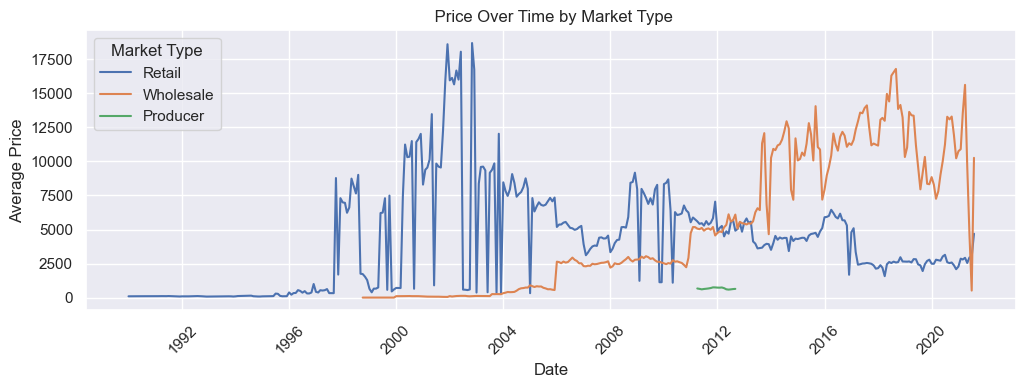

In [33]:
# Create subplot for Price 
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.lineplot(data=price_quantity_by_type, x='Date', y='Price', hue='Market_Type')
plt.title(' Price Over Time by Market Type')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Market Type')

Upon analyzing the presented line plot, a clear trend emerges: Retail consistently boasts the highest prices over the past three decades. It is followed by the wholesale category, while the producer category exhibits relatively minimal price fluctuations over time. This observation underscores the distinct price dynamics across these segments as depicted by the dataset. Notably, the retail segment appears to wield significant influence on price trends, further emphasizing its pivotal role in shaping the overall pricing landscape.

4.Total Quantity sold over time

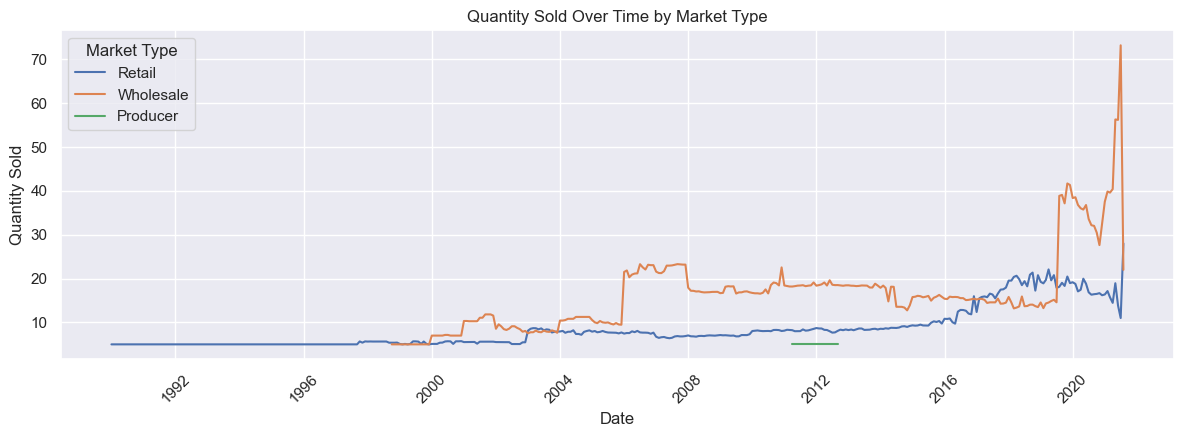

In [34]:
# Create subplot for Quantity 
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
sns.lineplot(data=price_quantity_by_type, x='Date', y='Quantity', hue='Market_Type')
plt.title('Quantity Sold Over Time by Market Type')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Market Type')

plt.tight_layout()
plt.show()


Upon reviewing this trend, it becomes evident that the wholesale market type has consistently recorded the highest quantity of goods sold across different market types. Notably, a remarkable surge in demand is observed in the latter years, indicating a significant spike in sales. This heightened demand is attributed to the pandemic that transpired during that period, exerting a notable impact on market dynamics not only in that timeframe but also in the subsequent years.

Interestingly, retail, despite its longevity in the market compared to the other two types, secures the second spot in terms of quantity sold. Producers, on the other hand, rank last in terms of the quantities they contribute to the market. This trend leads us to deduce that wholesale market activities wield considerable influence over the total quantity of goods sold within the market. Such insights underscore the nuanced interplay between market types, demand dynamics, and external factors like the pandemic in shaping these trends

5.Top 10 Food Produce in Africa 

In [35]:
# Gropued Year,Country and Prices to perform data aggregation and summarization
sales_data = food_prices.groupby(['Year', 'Country'])['Price'].agg(['sum', 'count', 'mean']).reset_index()

In [36]:
#Top 10 Food Produce in Africa
produce=food_prices.Produce.value_counts().head(10)
produce.head(10)

Millet - Retail                  47476
Rice (imported) - Retail         47022
Sorghum - Retail                 44679
Maize - Retail                   43073
Maize (white) - Retail           33786
Rice (local) - Retail            31126
Groundnuts (shelled) - Retail    23221
Beans (dry) - Retail             16173
Beans (niebe) - Retail           15760
Rice - Retail                    15513
Name: Produce, dtype: int64

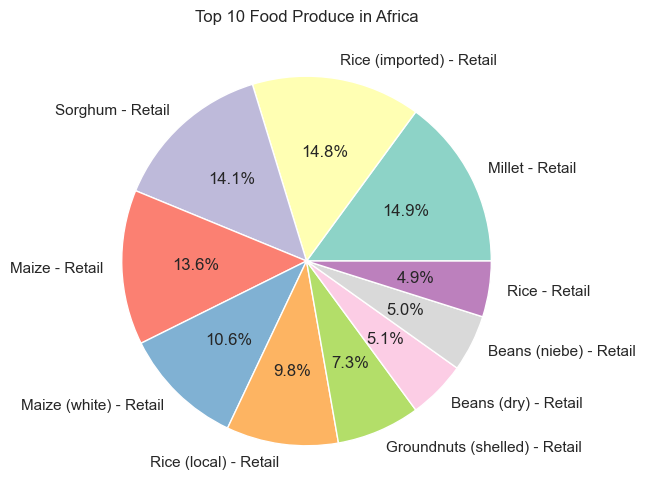

In [37]:
produce=food_prices.Produce.value_counts().head(10)
plt.figure(figsize=(12,6))
plt.title('Top 10 Food Produce in Africa')
color_palette = plt.cm.Set3.colors
plt.pie(produce, labels=produce.index, autopct= '%1.1f%%', colors=color_palette);

The most produced foods in the African market, as per the analysis of the given dataset, are as follows, along with their respective percentages indicated in the pie chart:
Millet - Retail: 14.9%
Rice (Imported) - Retail: 14.8%
Sorghum - Retail: 14.1%
Maize - Retail: 13.6%
Maize (White) - Retail: 10.6%
These top five items, among many others, collectively represent the dominant food products in the African market, with their corresponding percentages displayed in the accompanying pie chart.